## K-Means Clustering
1. Unsupervised machine learning
2. main goal is to group similar data together
3. data is unlabelled (no target features)

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('Mall_Customers (1).csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns = ['Id','Gender','Age','Income','Spendscore']
df

,Id,Gender,Age,Income,Spendscore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spendscore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

Id            0
Gender        0
Age           0
Income        0
Spendscore    0
dtype: int64

#### Visualise income vs Spending Score

<Axes: xlabel='Income', ylabel='Spendscore'>

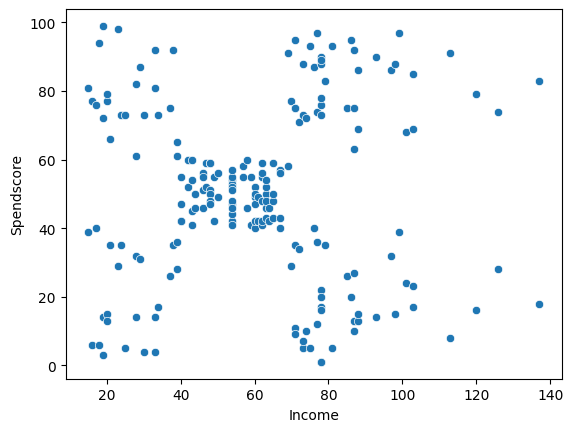

In [6]:
import seaborn as sns
sns.scatterplot(data=df,x='Income',y='Spendscore')

#### Get X feature

In [7]:
X =df [['Income','Spendscore']]
X.head()

,Income,Spendscore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### Create a preprocessing Pipeline

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [9]:
# Numeric pipeline
num_pipe = Pipeline(steps=([('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())]))

In [10]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

#### Apply Elbow method to get optimum no of clusters

In [11]:
%pip install yellowbrick


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


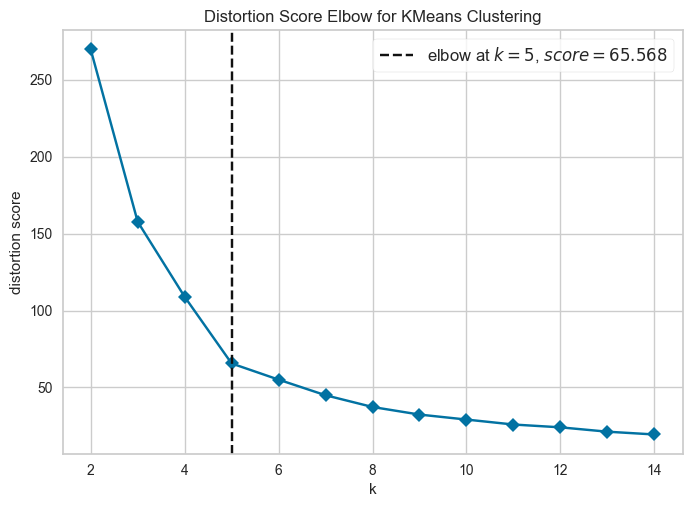

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [12]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans
kelbow_visualizer(KMeans(),
                  X_pre ,
                  k=(2,15),
                  timings=False)


#### Create K=5 Clusters

In [13]:
model = KMeans(n_clusters=5)
model.fit(X_pre)

KMeans(n_clusters=5)

In [14]:
lb = model.labels_
lb

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [15]:
X['label'] = lb

In [16]:
X

,Income,Spendscore,label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


#### Check different Labels

In [17]:
X[X['label']==0]

,Income,Spendscore,label
124,70,29,0
128,71,11,0
130,71,9,0
134,73,5,0
136,73,7,0
138,74,10,0
140,75,5,0
144,77,12,0
146,77,36,0
148,78,22,0


In [18]:
X[X['label']==1]

,Income,Spendscore,label
43,39,61,1
46,40,55,1
47,40,47,1
48,40,42,1
49,40,42,1
...,...,...,...
121,67,40,1
122,69,58,1
126,71,35,1
132,72,34,1


In [19]:
X[X['label']==2]

,Income,Spendscore,label
123,69,91,2
125,70,77,2
127,71,95,2
129,71,75,2
131,71,75,2
133,72,71,2
135,73,88,2
137,73,73,2
139,74,72,2
141,75,93,2


In [20]:
X[X['label']==3]

,Income,Spendscore,label
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3


In [21]:
X[X['label']==4]

,Income,Spendscore,label
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


#### Visualise the clusters

<Axes: xlabel='Income', ylabel='Spendscore'>

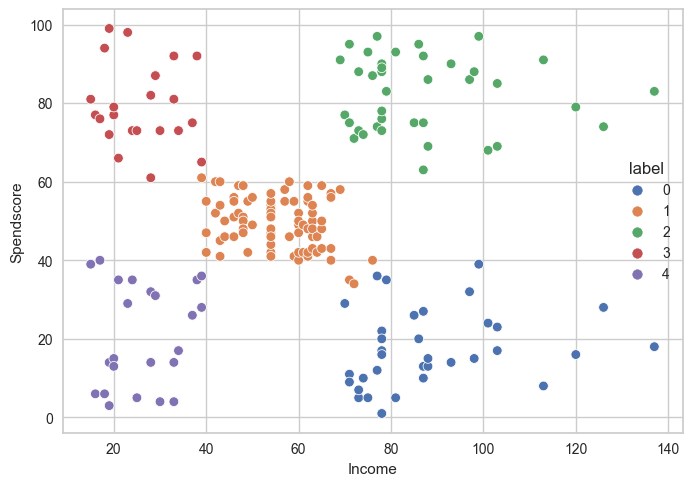

In [22]:
sns.scatterplot(data=X ,x='Income',y='Spendscore',hue='label',palette='deep')

#### Clustering on basis of age,income,spend

In [23]:
X = df [['Age','Income','Spendscore']]
X

,Age,Income,Spendscore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [24]:
# Numeric pipeline2
num_pipe2 = Pipeline(steps=([('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())]))

In [25]:
X_pre = num_pipe2.fit_transform(X)
X_pre

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

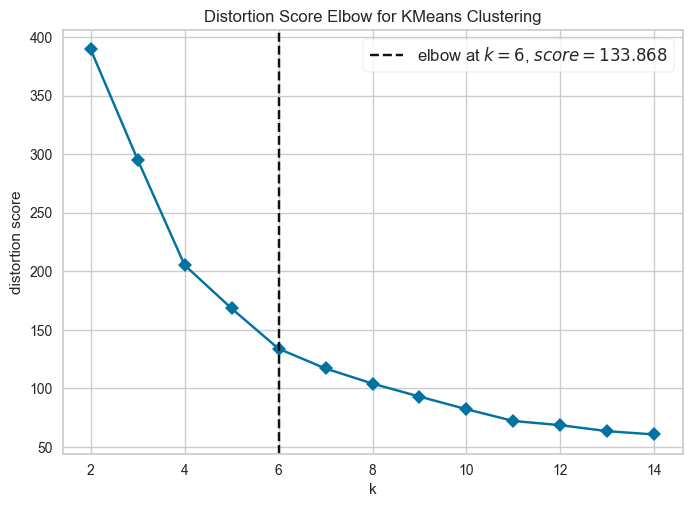

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [26]:
kelbow_visualizer(KMeans(),
                  X_pre,
                  k=(2,15),
                  timings=False)

In [27]:
model2 =KMeans(n_clusters=6)
model2.fit(X-X_pre)

KMeans(n_clusters=6)

In [28]:
lb2 = model2.labels_
lb2

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 0,
       4, 3, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 5, 0, 5, 0, 5, 2, 5, 2, 5,
       0, 5, 2, 5, 2, 5, 2, 5, 2, 5, 0, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5])

In [29]:
X['label']=lb2

In [30]:
X

,Age,Income,Spendscore,label
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
...,...,...,...,...
195,35,120,79,5
196,45,126,28,2
197,32,126,74,5
198,32,137,18,2


In [31]:
for i in range (6):
    print(f'label : {i} \n')
    display(X[X['label']==i])
    print('\n****************\n')

label : 0 



,Age,Income,Spendscore,label
43,31,39,61,0
47,27,40,47,0
48,29,40,42,0
49,31,40,42,0
51,33,42,60,0
52,31,43,54,0
58,27,46,51,0
61,19,46,55,0
65,18,48,59,0
68,19,48,59,0



****************

label : 1 



,Age,Income,Spendscore,label
40,65,38,35,1
42,48,39,36,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1



****************

label : 2 



,Age,Income,Spendscore,label
128,59,71,11,2
130,47,71,9,2
134,20,73,5,2
136,44,73,7,2
138,19,74,10,2
140,57,75,5,2
144,25,77,12,2
146,48,77,36,2
148,34,78,22,2
150,43,78,17,2



****************

label : 3 



,Age,Income,Spendscore,label
1,21,15,81,3
3,23,16,77,3
5,22,17,76,3
7,23,18,94,3
9,30,19,72,3
11,35,19,99,3
13,24,20,77,3
15,22,20,79,3
17,20,21,66,3
19,35,23,98,3



****************

label : 4 



,Age,Income,Spendscore,label
0,19,15,39,4
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4



****************

label : 5 



,Age,Income,Spendscore,label
123,39,69,91,5
125,31,70,77,5
127,40,71,95,5
129,38,71,75,5
131,39,71,75,5
133,31,72,71,5
135,29,73,88,5
137,32,73,73,5
139,35,74,72,5
141,32,75,93,5



****************



#### Visualise the data

#### Visualise data

In [34]:
%pip install plotly nbformat


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import plotly.express as px
fig = px.scatter_3d(data_frame=X,x='Age',y='Income',z='Spendscore',color='label')
fig.show()